In [1]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq
!pip install konlpy

In [2]:
%matplotlib inline
import matplotlib as mpl # 기본 설정 만지는 용도
import matplotlib.pyplot as plt # 그래프 그리는 용도
import matplotlib.font_manager as fm # 폰트 관련 용도

In [3]:
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
# 우선 fm._rebuild() 를 해주고 # 폰트 매니저 재빌드가 필요하다.
fm._rebuild()

NanumGothic Eco


In [4]:
%matplotlib inline
import matplotlib as mpl # 기본 설정 만지는 용도
import matplotlib.pyplot as plt # 그래프 그리는 용도
import matplotlib.font_manager as fm # 폰트 관련 용도
import numpy as np

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf' # 설치된 나눔글꼴중 원하는 녀석의 전체
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
## 음수 표시되도록 설정
mpl.rcParams['axes.unicode_minus'] = False

NanumGothic Eco


In [5]:
import konlpy
import nltk
from konlpy.tag import Kkma ### 꼬꼬마
from konlpy.tag import Hannanum ### 한나눔
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [6]:
import pandas as pd
# 가을 인기차트 제목에 '가을' 이 많이 들어갈까?

chart_20_09 = pd.read_excel("/content/melon_2020.09.xlsx")
chart_20_10 = pd.read_excel("/content/melon_2020.10.xlsx")
chart_20_11 = pd.read_excel("/content/melon_2020.11.xlsx")

chart_20_autumn = chart_20_09['제목']+chart_20_10['제목']+chart_20_11['제목']
chart_20_autumn.to_csv("chart_2020_autumn.csv")

doc_ko = open("/content/chart_2020_autumn.csv").read()
doc_ko[1:2000]

from konlpy.tag import Okt
t = Okt()
doc_nouns = t.nouns(doc_ko)

print( len( doc_nouns ) )

223


In [7]:
ko = nltk.Text(doc_nouns, name="가을_차트")
print(type(ko))
print(len(ko.tokens))


<class 'nltk.text.Text'>
223


In [8]:
most_fre = ko.vocab().most_common(50)
most_fre

[('사랑', 14),
 ('취향', 6),
 ('저격', 6),
 ('그녀', 6),
 ('마음', 6),
 ('순간', 6),
 ('널', 6),
 ('밤', 6),
 ('너', 6),
 ('모든', 6),
 ('노래', 4),
 ('취기', 3),
 ('산들', 3),
 ('다시', 3),
 ('여기', 3),
 ('바닷가', 3),
 ('마리아', 3),
 ('선미', 3),
 ('움찔', 3),
 ('규현', 3),
 ('로', 3),
 ('꽃', 3),
 ('속', 3),
 ('네', 3),
 ('샴푸', 3),
 ('향', 3),
 ('홀로', 3),
 ('이별', 3),
 ('거지', 3),
 ('살짝', 3),
 ('집', 3),
 ('앞', 3),
 ('골목길', 3),
 ('것', 3),
 ('위', 3),
 ('시', 3),
 ('줄', 3),
 ('더욱', 3),
 ('남아', 3),
 ('거짓말', 3),
 ('날', 3),
 ('오늘', 3),
 ('온', 3),
 ('처음처럼', 3),
 ('왜', 3),
 ('봄날', 3),
 ('건', 2),
 ('내', 2),
 ('비', 2),
 ('덤디덤디', 2)]

In [9]:
print(len(set(ko.tokens)))

80


In [10]:

# stop_words = open("/content/연간제목차트_단어.txt").read()
# from konlpy.tag import Okt
# t = Okt()
# stop_nouns = t.nouns(stop_words)
# stop_nouns
# ko2 = nltk.Text(stop_nouns, name="연간_차트_불용어")
# most_fre_sw = ko2.vocab().most_common(20)
# most_fre_sw
# df = pd.DataFrame(most_fre_sw)
# df.to_csv("/content/연간제목상위20개단어.txt", sep='\t', index=False)

In [34]:
stop_words2 = ['사랑', '너', '나', '밤', '모든', '널', '연애', 
               '길잡이', '순간', '취향', '저격', '그녀', '이별', '마음', '꽃', '속', '네',
               '샴푸', '향', '거지'] #연간 탑 20개 공통 단어
stop_words3 = ['제목', '건', '내', '로', '비', '그', '로', '것', '위', '시', '줄', '남아', '날', '온', '안', '싹', '해', '무',
               '거'] #불용어
stop_words4 = ['산들', '선미', '규현', '태연', '비', '황광희', '윤미래'] #가수 
          
new_ko = [ ]
for one_word in ko:
  if one_word not in stop_words2:
    new_ko.append(one_word)
print(new_ko)


['제목', '취기', '산들', '건', '다시', '여기', '바닷가', '취기', '산들', '잠', '마리아', '선미', '취기', '산들', '선미', '노래', '노래', '움찔', '규현', '마리아', '딩가딩', '내', '움찔', '규현', '내', '움찔', '규현', '선미', '로', '비', '다시', '여기', '바닷가', '홀로', '로', '덤디덤디', '마리아', '홀로', '살짝', '태연', '그', '여름', '집', '앞', '골목길', '집', '앞', '골목길', '로', '것', '위', '시', '홀로', '것', '위', '시', '살짝', '줄', '어사', '더욱', '남아', '거짓말', '보라', '빛', '거짓말', '생각', '더욱', '남아', '날', '덤디덤디', '날', '거짓말', '건', '집', '앞', '골목길', '비', '서면역', '줄', '것', '위', '시', '날', '오늘', '온', '더욱', '남아', '처음처럼', '다시', '여기', '바닷가', '여름', '안', '싹', '황광희', '적재', '오늘', '온', '오늘', '온', '노래', '우리', '왜', '왜', '해', '마마', '무', '처음처럼', '봄날', '살짝', '봄날', '서면역', '서너', '시작', '보라', '빛', '남', '거', '우리', '왜', '해', '줄', '윤미래', '노래', '봄날', '사람', '소개', '안녕', '처음처럼', '안녕', '시작']


In [47]:
stop_words3 = ['제목', '건', '내', '로', '비', '그', '로', '것', '위', '시', '줄', '남아', '날', '온', '안', '싹', '해', '무',
               '거']

In [48]:
stop_words4 = ['산들', '선미', '규현', '태연', '비', '황광희', '윤미래']

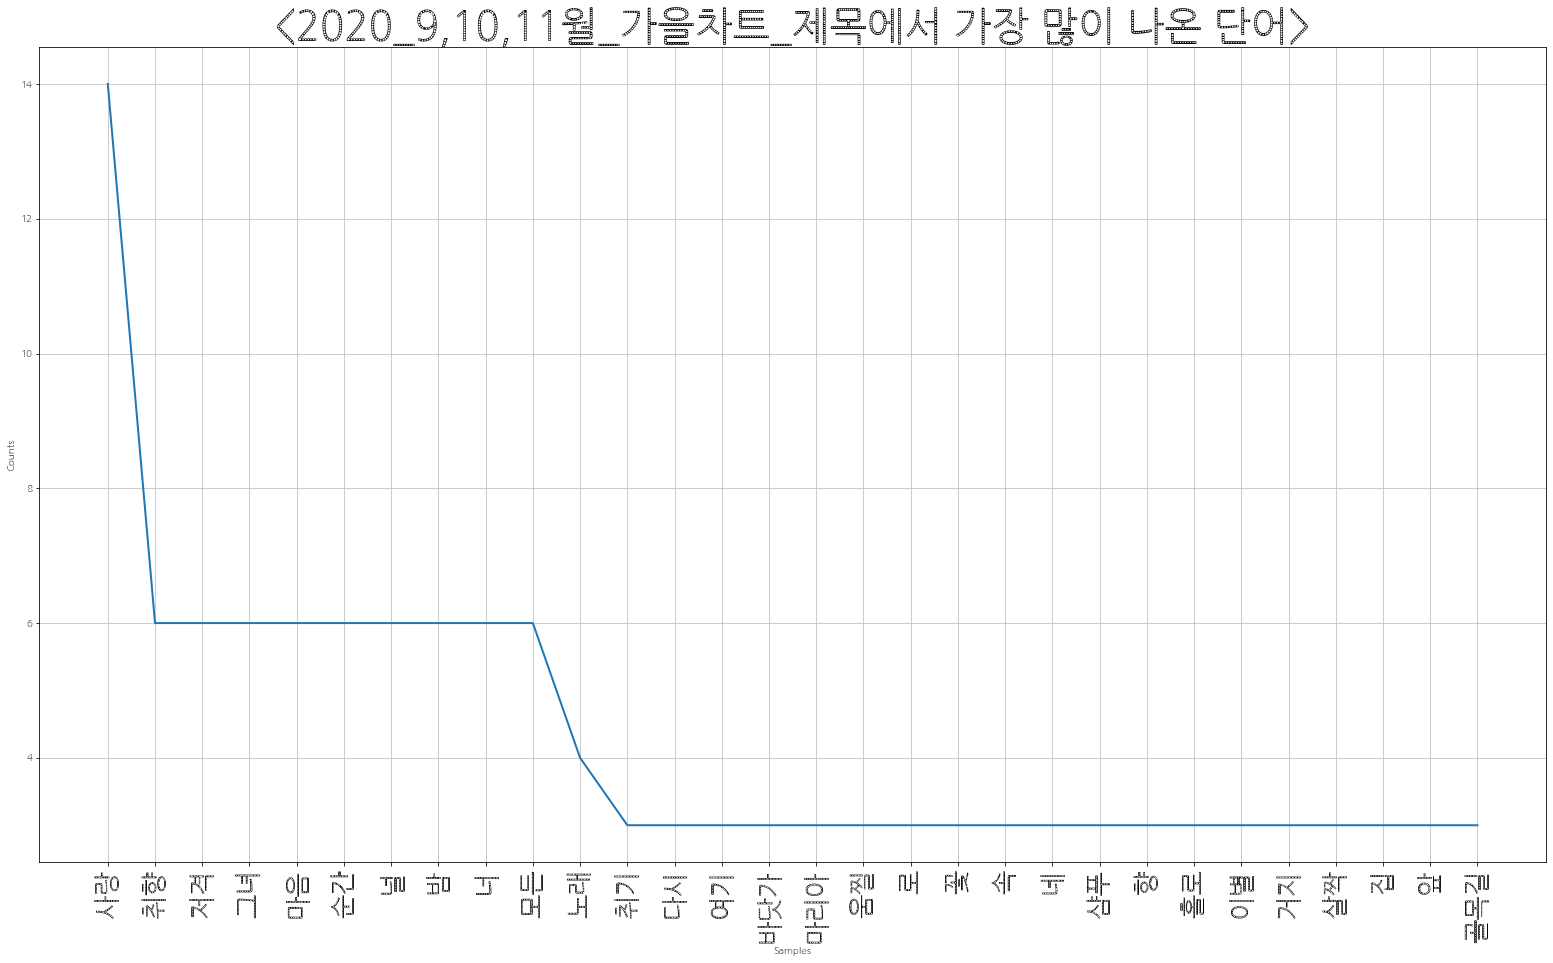

In [22]:
### nltk Text 객체 만들기
new_ko = nltk.Text(new_ko, name="가을_2020")
plt.figure(figsize=(27,15))
plt.title("<2020_9,10,11월_가을차트_제목에서 가장 많이 나온 단어>", fontsize=40)
plt.xticks(fontsize=26)
new_ko.plot(30)

In [15]:
data = new_ko.vocab().most_common(1000)

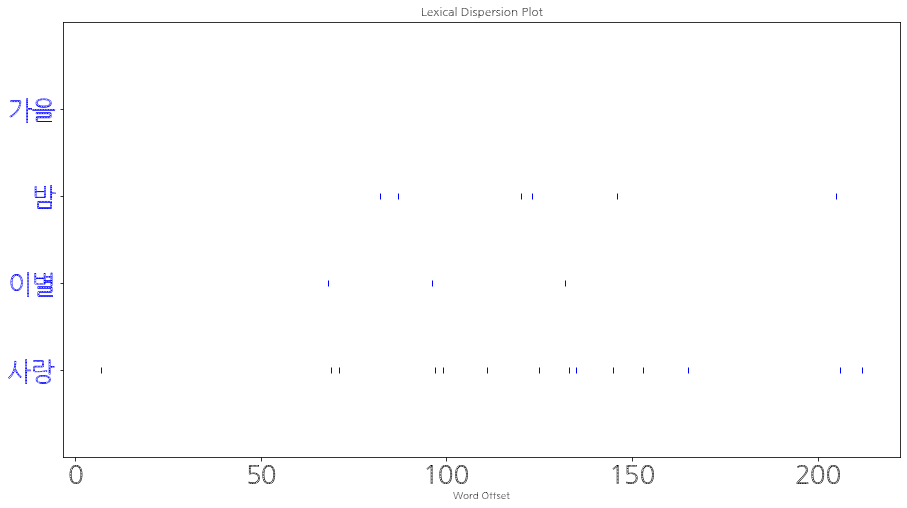

In [16]:
plt.figure(figsize=(15,8))
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
new_ko.dispersion_plot(['가을', '밤', '이별','사랑'])

> 이미지 워드클라우드 마스크

In [ ]:
# pip install stylecloud
# import stylecloud

# my_long_list = ['시', '거지', '내', '네', '건', '것', '길잡이', 
#               '나', '너', '이', '시', '위', '취기', '정은지', '양요섭', '산들',
#               '취향', '저격', '롤린', '로', '마', '말', '아이', '적재', '기리보이',
#               '운전', '만해', '서동현', '허각', '선미','움찔', '앞', '규현']

# text={"연애":500, "밤하늘":253, "봄":233, "봄날":323, "꽃":322}

# stylecloud.gen_stylecloud(text=text, icon_name="fab fa-itunes-note", 
#                           palette='cartocolors.diverging.TealRose_7', 
#                           custom_stopwords=my_long_list, 
#                           font_path="/content/BMHANNAProOTF.otf")

# stylecloud.gen_stylecloud(file_path="/content/chart_2021_spring", 
#                           icon_name="fab fa-itunes-note", 
#                           palette='cartocolors.diverging.TealRose_7')
# stylecloud.png

In [ ]:
autumn_mask = np.array(Image.open("/content/단풍5.png"))
autumn_mask[0]


In [ ]:
wc = WordCloud(font_path="/content/D2Coding.ttf",
              background_color='white', 
               max_words=200,
               mask=autumn_mask,   
               contour_width=3, 
               contour_color='orange').generate_from_frequencies(dict(data))

In [ ]:
plt.figure(figsize=(15,8)) # 크기
plt.imshow(autumn_mask,cmap=plt.cm.gray) #bilinear - 보정
plt.axis('off')
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.imshow(wc)
plt.axis("off")
plt.show()